In [1]:
import os
os.chdir("..")
os.getcwd()

'/Users/oscarmauriciomoraarroyo/proyecto_lyapunov_chagas'

In [ ]:
Importaciones y carga

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

agg_path = "data/clean/chagas_prepared.csv"
agg = pd.read_csv(agg_path)

agg.head()

,ANO,SEMANA,Departamento_residencia,Municipio_residencia,casos
0,2024,1,ARAUCA,ARAUCA,1
1,2024,1,ARAUCA,ARAUQUITA,1
2,2024,1,ARAUCA,FORTUL,1
3,2024,1,ARAUCA,SARAVENA,4
4,2024,1,ARAUCA,TAME,1


Definir el “foco” del modelo SEIR (La idea es escoger un municipio con buena cantidad de casos para usarlo como base del modelo)

Top municipios por casos

In [3]:
top_mpios = (
    agg.groupby(["Departamento_residencia", "Municipio_residencia"])["casos"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_mpios

Departamento_residencia  Municipio_residencia
CESAR                    VALLEDUPAR              117
CASANARE                 YOPAL                    65
GUAJIRA                  SAN JUAN DEL CESAR       57
BOYACA                   MONIQUIRA                48
SANTANDER                BUCARAMANGA              40
NORTE SANTANDER          CUCUTA                   27
CASANARE                 AGUAZUL                  24
ARAUCA                   SARAVENA                 21
BOYACA                   CUBARA                   20
BOGOTA                   BOGOTA                   17
Name: casos, dtype: int64

Filtrar un municipio

In [5]:
DEP = "CESAR"
MPIO = "VALLEDUPAR"

foco = (
    agg[
        (agg["Departamento_residencia"] == DEP)
        & (agg["Municipio_residencia"] == MPIO)
    ]
    .copy()
    .sort_values(["ANO", "SEMANA"])
)

foco.head()

,ANO,SEMANA,Departamento_residencia,Municipio_residencia,casos
10,2024,1,CESAR,VALLEDUPAR,2
66,2024,4,CESAR,VALLEDUPAR,1
110,2024,7,CESAR,VALLEDUPAR,6
132,2024,9,CESAR,VALLEDUPAR,1
146,2024,10,CESAR,VALLEDUPAR,1


Construir la serie temporal para el modelo

Celda: crear columna fecha (lunes de cada semana)

In [6]:
foco["fecha"] = pd.to_datetime(
    foco["ANO"].astype(str) + foco["SEMANA"].astype(str) + "1",
    format="%G%V%u",
)

foco_ts = foco[["fecha", "ANO", "SEMANA", "casos"]].sort_values("fecha")
foco_ts.head()

,fecha,ANO,SEMANA,casos
10,2024-01-01,2024,1,2
66,2024-01-22,2024,4,1
110,2024-02-12,2024,7,6
132,2024-02-26,2024,9,1
146,2024-03-04,2024,10,1


Guardar esta serie como insumo para el modelo (provisional)

In [7]:
out_path = "data/clean/chagas_ts_foco.csv"
foco_ts.to_csv(out_path, index=False)

out_path

'data/clean/chagas_ts_foco.csv'

Grafica de la serie del foco

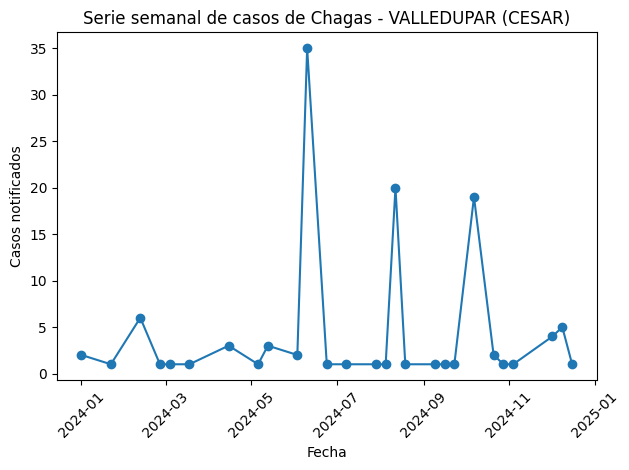

In [8]:
plt.figure()
plt.plot(foco_ts["fecha"], foco_ts["casos"], marker="o")
plt.xlabel("Fecha")
plt.ylabel("Casos notificados")
plt.title(f"Serie semanal de casos de Chagas - {MPIO} ({DEP})")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()